In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from gmfs_vh import gmf_rs2_v2, gmf_s1_v2

import os, pickle as pkl


In [28]:
incidence = np.arange(17,50)
windspeed = np.arange(3,80,0.2)  

# OLD GMF (ms1ahw)

In [29]:
path = "./GMF_cmodms1ahw/"

sigma0_db = np.ascontiguousarray(np.transpose(np.load(os.path.join(path, 'sigma.npy'))))
inc = pkl.load(open(os.path.join(path, 'incidence_angle.pkl'), 'rb'), encoding='iso-8859-1')
wspd = pkl.load(open(os.path.join(path, 'wind_speed.pkl'), 'rb'), encoding='iso-8859-1')

In [35]:
sigma0_ms1ahw_dB = xr.DataArray(sigma0_db, dims=('wspd','inc'), coords = (wspd,inc))
final_dims = ('inc','wspd')
sigma0_ms1ahw_dB = sigma0_ms1ahw_dB.transpose(*final_dims)
sigma0_ms1ahw_dB.name = 'sigma0_gmf'
sigma0_ms1ahw_dB.attrs['units'] = 'dB'
sigma0_ms1ahw_dB.attrs['model'] = "ms1ahw"
sigma0_ms1ahw_dB.attrs['resolution'] = 'high'
sigma0_ms1ahw_dB

# RS2 

In [53]:
sigma0_rs2 = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")

for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_rs2[i_inc, i_wspd] = gmf_rs2_v2(one_inc, one_wspd)
sigma0_rs2.attrs['units'] = 'linear'
sigma0_rs2.attrs['model'] = "rs2_v2"
sigma0_rs2.attrs['resolution'] = 'low'
sigma0_rs2

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)>
array([[8.26105368e-05, 9.54246277e-05, 1.09277205e-04, ...,
        2.56052146e-02, 2.56887540e-02, 2.57723593e-02],
       [8.13457982e-05, 9.38903256e-05, 1.07440832e-04, ...,
        2.57304020e-02, 2.58149244e-02, 2.58995151e-02],
       [8.00977518e-05, 9.23774532e-05, 1.05631463e-04, ...,
        2.58136625e-02, 2.58990141e-02, 2.59844361e-02],
       ...,
       [5.17108292e-05, 5.82893750e-05, 6.52314846e-05, ...,
        1.61280122e-02, 1.61858811e-02, 1.62438119e-02],
       [5.09224932e-05, 5.73521367e-05, 6.41315445e-05, ...,
        1.56812601e-02, 1.57375059e-02, 1.57938118e-02],
       [5.01488592e-05, 5.64329394e-05, 6.30534293e-05, ...,
        1.52506538e-02, 1.53053238e-02, 1.53600520e-02]])
Coordinates:
  * inc      (inc) int64 17 18 19 20 21 22 23 24 25 ... 42 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3.0 3.2 3.4 3.6 3.8 4.0 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       rs2_v2
    resolution:  low

# S1

In [54]:
sigma0_s1 = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")

for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_s1[i_inc, i_wspd] = gmf_s1_v2(one_inc, one_wspd)
sigma0_s1.attrs['units'] = 'linear'
sigma0_s1.attrs['model'] = "s1_v2"
sigma0_s1.attrs['resolution'] = 'low'
sigma0_s1

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)>
array([[4.96077374e-05, 5.74503338e-05, 6.59876370e-05, ...,
        3.34840075e-02, 3.36180057e-02, 3.37522019e-02],
       [4.89504875e-05, 5.67146070e-05, 6.51687621e-05, ...,
        3.45281092e-02, 3.46678026e-02, 3.48077086e-02],
       [4.82820791e-05, 5.59631155e-05, 6.43287769e-05, ...,
        3.54484650e-02, 3.55933535e-02, 3.57384684e-02],
       ...,
       [3.60957548e-05, 4.17916838e-05, 4.79726768e-05, ...,
        2.35166438e-02, 2.36169580e-02, 2.37174467e-02],
       [3.61031466e-05, 4.17855797e-05, 4.79501186e-05, ...,
        2.28330310e-02, 2.29297720e-02, 2.30266787e-02],
       [3.61380918e-05, 4.18104476e-05, 4.79621905e-05, ...,
        2.21524900e-02, 2.22456565e-02, 2.23389796e-02]])
Coordinates:
  * inc      (inc) int64 17 18 19 20 21 22 23 24 25 ... 42 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3.0 3.2 3.4 3.6 3.8 4.0 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       s1_v2
    resolution:  low

## Plot example

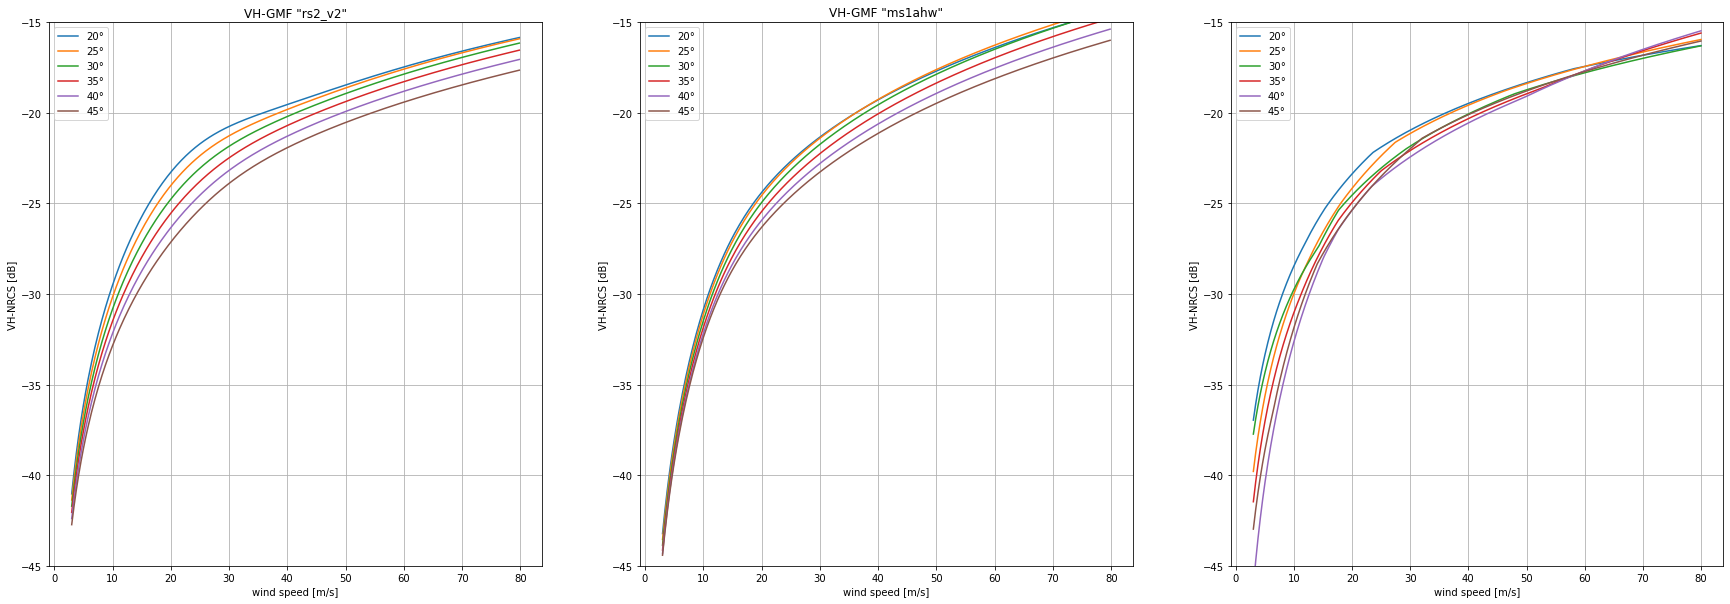

In [52]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30, 10)

for i,inc in enumerate(np.arange(20,50,5)):
    axs[0].plot(sigma0_rs2.wspd,10*np.log10(sigma0_rs2.sel(inc=inc)),label=str(inc)+"°")
    axs[1].plot(sigma0_s1.wspd,10*np.log10(sigma0_s1.sel(inc=inc)),label=str(inc)+"°")

    axs[2].plot(sigma0_ms1ahw_dB.wspd,sigma0_ms1ahw_dB.sel(inc=inc),label=str(inc)+"°")



axs[0].set_title('VH-GMF "rs2_v2"')
axs[1].set_title('VH-GMF "s1_v2"')
axs[1].set_title('VH-GMF "ms1ahw"')

for ax in axs : 
    
    ax.legend()
    ax.grid()
    ax.set_ylim((-45,-15))
    ax.set_xlabel("wind speed [m/s]")
    ax.set_ylabel("VH-NRCS [dB]")